In [1]:
import pandas as pd
import os

In [2]:
print(os.getcwd())
print(os.listdir(os.getcwd()))

/home/kde/workShare/projet_covid_19/Livrable
['p.html', 'styling_selections.html', 'COVID_ML_reprise.ipynb', 'analyse_deces_guerison_infection.ipynb', 'df_HTML.html', 'Ressources_Data', 'Fichiers_Excel', 'Dataset_ServiceRea_Geolocalisation.ipynb', 'DataSet_ML_Patient_Profile_world.ipynb', '.ipynb_checkpoints', 'Fichiers_Tableau', 'Fichiers_PowerBI', 'Dataset_ServiceREA.ipynb', 'webscraping_googleNews_covid.ipynb', 'Covid_ML_infection_sans_confinement.ipynb']


In [3]:
#path = '/home/kde/workShare/projet_covid_19/Livrable/Ressources_Data/Nombre_de_cas_par_Departement.csv'
#df_numPersMedical = pd.read_csv(path, sep = ',', header=0)

path3 = 'https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7'
df_numPersMedical3 = pd.read_csv(path3, sep = ';', header=0, encoding='utf-8')

path2 = '/home/kde/workShare/projet_covid_19/Livrable/Ressources_Data/capaciteLit.csv'
df_capaciteLit = pd.read_csv(path2, sep = ',', header=0)

#path4 = '/home/kde/workShare/projet_covid_19/Livrable/Ressources_Data/departements_francais_Geolocalisation.csv'
##df_geoDep = pd.read_csv(path4, sep = ';', header=0, encoding='cp1252')

### Data engineering

In [4]:
df_numPersMedical3.insert(7,"Cadre_REA", "null")
df_numPersMedical3.insert(8,"IDE_REA", "null")
df_numPersMedical3.insert(9,"AS_REA", "null")

In [5]:
df_filtre = df_numPersMedical3.loc[df_numPersMedical3['sexe']==0]
df_filtre.drop(columns=['sexe'],inplace = True)

/home/kde/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
df_filtre

dep        jour  hosp  rea  rad  dc Cadre_REA IDE_REA AS_REA
0       01  2020-03-18     2    0    1   0      null    null   null
3       02  2020-03-18    41   10   18  11      null    null   null
6       03  2020-03-18     4    0    1   0      null    null   null
9       04  2020-03-18     3    1    2   0      null    null   null
12      05  2020-03-18     8    1    9   0      null    null   null
...    ...         ...   ...  ...  ...  ..       ...     ...    ...
39075  971  2020-07-24     8    1   83  17      null    null   null
39078  972  2020-07-24    11    4   93  15      null    null   null
39081  973  2020-07-24   136   26  887  38      null    null   null
39084  974  2020-07-24    22    4  159   3      null    null   null
39087  976  2020-07-24    13    2  410  28      null    null   null

[13030 rows x 9 columns]

In [7]:
df_capaciteLit

Code              Département                      Région  2018_CHU  \
0     01                      Ain         Auverge-Rhône-Alpes         0   
1     02                    Aisne             Hauts-de-France         0   
2     03                   Allier         Auverge-Rhône-Alpes         0   
3     04  Alpes-de-Haute-Provence  Provence-Alpes-Côte-D’azur         0   
4     05             Hautes-Alpes  Provence-Alpes-Côte-D’azur         0   
..   ...                      ...                         ...       ...   
96   971              Guadeloupe                   Guadeloupe        24   
97   972              Martinique                   Martinique        29   
98   973                   Guyane                      Guyane         0   
99   974               La Réunion                  La Réunion        61   
100  976                  Mayotte                     Mayotte         0   

     2018_autre  calcul  
0            22      22  
1            34      34  
2            24      24  
3             6       6  
4             8       8  
..          ...     ...  
96            5      29  
97            0      29  
98           13      13  
99            0      61  
100          10      10  

[101 rows x 6 columns]

In [8]:
df_filtre = df_filtre.merge(df_capaciteLit, left_on = df_filtre['dep'], right_on = df_capaciteLit['Code'])


In [9]:
df_filtre.columns

Index(['key_0', 'dep', 'jour', 'hosp', 'rea', 'rad', 'dc', 'Cadre_REA',
       'IDE_REA', 'AS_REA', 'Code', 'Département', 'Région', '2018_CHU',
       '2018_autre', 'calcul'],
      dtype='object')

In [10]:
df_filtre = df_filtre[['jour', 'Région', 'Département', 'Code',
       'hosp', 'rea', '2018_CHU', '2018_autre', 'calcul', 'Cadre_REA', 'IDE_REA',
       'AS_REA', 'rad', 'dc']]
df_filtre.rename(columns={"Région": "region", 
                          "Département": "nom_dep", 
                          "Code": "code_dep", 
                          "2018_CHU": "chu_2019", 
                          "2018_autre": "autre_2019", 
                          "calcul": "nbre_lit", 
                          "rad": "retour_dom", 
                          "dc":"deces"},  inplace = True)

In [11]:
df_filtre

jour               region  nom_dep code_dep  hosp  rea  chu_2019  \
0      2020-03-18  Auverge-Rhône-Alpes      Ain       01     2    0         0   
1      2020-03-19  Auverge-Rhône-Alpes      Ain       01     2    0         0   
2      2020-03-20  Auverge-Rhône-Alpes      Ain       01     2    0         0   
3      2020-03-21  Auverge-Rhône-Alpes      Ain       01     4    0         0   
4      2020-03-22  Auverge-Rhône-Alpes      Ain       01     8    1         0   
...           ...                  ...      ...      ...   ...  ...       ...   
13024  2020-07-20              Mayotte  Mayotte      976     7    2         0   
13025  2020-07-21              Mayotte  Mayotte      976     7    2         0   
13026  2020-07-22              Mayotte  Mayotte      976    11    3         0   
13027  2020-07-23              Mayotte  Mayotte      976    10    3         0   
13028  2020-07-24              Mayotte  Mayotte      976    13    2         0   

       autre_2019  nbre_lit Cadre_REA IDE_REA AS_REA  retour_dom  deces  
0              22        22      null    null   null           1      0  
1              22        22      null    null   null           1      0  
2              22        22      null    null   null           1      0  
3              22        22      null    null   null           1      0  
4              22        22      null    null   null           2      0  
...           ...       ...       ...     ...    ...         ...    ...  
13024          10        10      null    null   null         403     28  
13025          10        10      null    null   null         403     28  
13026          10        10      null    null   null         405     28  
13027          10        10      null    null   null         408     28  
13028          10        10      null    null   null         410     28  

[13029 rows x 14 columns]

In [12]:
df_filtre['Taux_Occupation'] = round(df_filtre['rea']/df_filtre['nbre_lit']*100, 2)
df_filtre

jour               region  nom_dep code_dep  hosp  rea  chu_2019  \
0      2020-03-18  Auverge-Rhône-Alpes      Ain       01     2    0         0   
1      2020-03-19  Auverge-Rhône-Alpes      Ain       01     2    0         0   
2      2020-03-20  Auverge-Rhône-Alpes      Ain       01     2    0         0   
3      2020-03-21  Auverge-Rhône-Alpes      Ain       01     4    0         0   
4      2020-03-22  Auverge-Rhône-Alpes      Ain       01     8    1         0   
...           ...                  ...      ...      ...   ...  ...       ...   
13024  2020-07-20              Mayotte  Mayotte      976     7    2         0   
13025  2020-07-21              Mayotte  Mayotte      976     7    2         0   
13026  2020-07-22              Mayotte  Mayotte      976    11    3         0   
13027  2020-07-23              Mayotte  Mayotte      976    10    3         0   
13028  2020-07-24              Mayotte  Mayotte      976    13    2         0   

       autre_2019  nbre_lit Cadre_REA IDE_REA AS_REA  retour_dom  deces  \
0              22        22      null    null   null           1      0   
1              22        22      null    null   null           1      0   
2              22        22      null    null   null           1      0   
3              22        22      null    null   null           1      0   
4              22        22      null    null   null           2      0   
...           ...       ...       ...     ...    ...         ...    ...   
13024          10        10      null    null   null         403     28   
13025          10        10      null    null   null         403     28   
13026          10        10      null    null   null         405     28   
13027          10        10      null    null   null         408     28   
13028          10        10      null    null   null         410     28   

       Taux_Occupation  
0                 0.00  
1                 0.00  
2                 0.00  
3                 0.00  
4                 4.55  
...                ...  
13024            20.00  
13025            20.00  
13026            30.00  
13027            30.00  
13028            20.00  

[13029 rows x 15 columns]

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

from matplotlib import style 
style.use('ggplot') or plt.style.use('ggplot')

<AxesSubplot:xlabel='jour', ylabel='Taux_Occupation'>

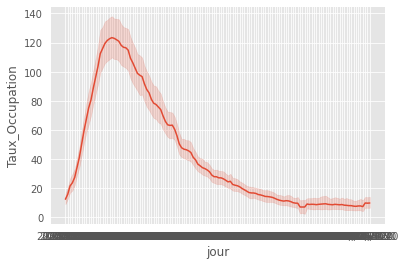

In [14]:
sns.lineplot('jour', 'Taux_Occupation', data = df_filtre)

In [15]:
df_filtre.head()

jour               region nom_dep code_dep  hosp  rea  chu_2019  \
0  2020-03-18  Auverge-Rhône-Alpes     Ain       01     2    0         0   
1  2020-03-19  Auverge-Rhône-Alpes     Ain       01     2    0         0   
2  2020-03-20  Auverge-Rhône-Alpes     Ain       01     2    0         0   
3  2020-03-21  Auverge-Rhône-Alpes     Ain       01     4    0         0   
4  2020-03-22  Auverge-Rhône-Alpes     Ain       01     8    1         0   

   autre_2019  nbre_lit Cadre_REA IDE_REA AS_REA  retour_dom  deces  \
0          22        22      null    null   null           1      0   
1          22        22      null    null   null           1      0   
2          22        22      null    null   null           1      0   
3          22        22      null    null   null           1      0   
4          22        22      null    null   null           2      0   

   Taux_Occupation  
0             0.00  
1             0.00  
2             0.00  
3             0.00  
4             4.55

In [16]:
df_remplirIDE = df_filtre.copy()

In [17]:
import math
# Calcul nombre d'infirmières : 2 infirmières pour 5 lits de réanimation
  
df_remplirIDE['IDE_REA']= df_remplirIDE['rea'].apply(lambda x: math.ceil(x/5)*2 if x >= 2 else 2)
        

In [18]:
# Calcul nombre d'aides-soignants pour 4 lits de réanimation
df_remplirIDE['AS_REA']= df_remplirIDE['rea'].apply(lambda x: math.ceil(x/4) if x >= 4 else 1)

In [19]:
# Calcul nombre de médecins en réanimation
def remplir(x):
    if x <= 1.6:
        x = 1
    elif x < 10:
        x = x/1.6
    elif 10 <= x < 15:
        x = x/2.6
    else:
        x = x/4.3
    return round(x,2)

df_remplirIDE['Cadre_REA']= df_remplirIDE['rea'].apply(lambda x: remplir(x))

In [20]:
#df_remplirIDE['jour'] = pd.to_datetime(df_remplirIDE['jour'].astype(str), format='%Y-%m-%d')
#df['DOB']=pd.to_datetime(df['DOB'].astype(str), format='%m/%d/%Y')

df_remplirIDE['code_dep'].replace({'2A': 20.1, '2B' : 20.2}, inplace = True)
df_remplirIDE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13029 entries, 0 to 13028
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   jour             13029 non-null  object 
 1   region           13029 non-null  object 
 2   nom_dep          13029 non-null  object 
 3   code_dep         13029 non-null  object 
 4   hosp             13029 non-null  int64  
 5   rea              13029 non-null  int64  
 6   chu_2019         13029 non-null  int64  
 7   autre_2019       13029 non-null  int64  
 8   nbre_lit         13029 non-null  int64  
 9   Cadre_REA        13029 non-null  float64
 10  IDE_REA          13029 non-null  int64  
 11  AS_REA           13029 non-null  int64  
 12  retour_dom       13029 non-null  int64  
 13  deces            13029 non-null  int64  
 14  Taux_Occupation  13029 non-null  float64
dtypes: float64(2), int64(9), object(4)
memory usage: 1.6+ MB


### Export du dataset nettoyé et enrichi

In [21]:
df_remplirIDE

jour               region  nom_dep code_dep  hosp  rea  chu_2019  \
0      2020-03-18  Auverge-Rhône-Alpes      Ain       01     2    0         0   
1      2020-03-19  Auverge-Rhône-Alpes      Ain       01     2    0         0   
2      2020-03-20  Auverge-Rhône-Alpes      Ain       01     2    0         0   
3      2020-03-21  Auverge-Rhône-Alpes      Ain       01     4    0         0   
4      2020-03-22  Auverge-Rhône-Alpes      Ain       01     8    1         0   
...           ...                  ...      ...      ...   ...  ...       ...   
13024  2020-07-20              Mayotte  Mayotte      976     7    2         0   
13025  2020-07-21              Mayotte  Mayotte      976     7    2         0   
13026  2020-07-22              Mayotte  Mayotte      976    11    3         0   
13027  2020-07-23              Mayotte  Mayotte      976    10    3         0   
13028  2020-07-24              Mayotte  Mayotte      976    13    2         0   

       autre_2019  nbre_lit  Cadre_REA  IDE_REA  AS_REA  retour_dom  deces  \
0              22        22       1.00        2       1           1      0   
1              22        22       1.00        2       1           1      0   
2              22        22       1.00        2       1           1      0   
3              22        22       1.00        2       1           1      0   
4              22        22       1.00        2       1           2      0   
...           ...       ...        ...      ...     ...         ...    ...   
13024          10        10       1.25        2       1         403     28   
13025          10        10       1.25        2       1         403     28   
13026          10        10       1.88        2       1         405     28   
13027          10        10       1.88        2       1         408     28   
13028          10        10       1.25        2       1         410     28   

       Taux_Occupation  
0                 0.00  
1                 0.00  
2                 0.00  
3                 0.00  
4                 4.55  
...                ...  
13024            20.00  
13025            20.00  
13026            30.00  
13027            30.00  
13028            20.00  

[13029 rows x 15 columns]

In [22]:
df_remplirIDE.to_csv(r'/home/kde/workShare/projet_covid_19/Livrable/Ressources_Data/Dataset_ML_Rea.csv', index = False, header=True)

In [27]:
# Test pour mise à jour quotidienne du dataset : prendre date de la veille
df_remplirIDE['jour']=='2020-07-24'

0        False
1        False
2        False
3        False
4        False
         ...  
13024    False
13025    False
13026    False
13027    False
13028     True
Name: jour, Length: 13029, dtype: bool